# DATA UNDERSTANDING & CLEANING

In [4]:
import pandas as pd
import numpy as np


**datasets**

In [6]:
demographics = pd.read_csv("/kaggle/input/telco-customer-churn-ibm-separated-data/Telco_customer_churn_demographics.csv")
services = pd.read_csv("/kaggle/input/telco-customer-churn-ibm-separated-data/Telco_customer_churn_services.csv")
status = pd.read_csv("/kaggle/input/telco-customer-churn-ibm-separated-data/Telco_customer_churn_status.csv")


In [7]:
print(demographics.shape)
print(services.shape)
print(status.shape)


(7043, 8)
(7043, 29)
(7043, 10)


In [10]:
services.columns


Index(['Customer ID', 'Quarter', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue'],
      dtype='object')

In [11]:
status.columns


Index(['Customer ID', 'Quarter', 'Satisfaction Score', 'Customer Status',
       'Churn Label', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Category',
       'Churn Reason'],
      dtype='object')

In [13]:
services[['Customer ID', 'Quarter']].duplicated().sum()


np.int64(0)

In [14]:
status[['Customer ID', 'Quarter']].duplicated().sum()


np.int64(0)

In [16]:
df = services.copy()


**Merge Demographics**

In [17]:
df = df.merge(
    demographics,
    on="Customer ID",
    how="left"
)


In [18]:
df.shape


(7043, 36)

In [23]:
df.head()

,Customer ID,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Dependents,Number of Dependents,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Q3,No,0,1,NaN,No,0.00,No,Yes,...,No,0,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,...,Yes,1,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,...,Yes,3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,...,Yes,1,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,...,Yes,1,2,Churned,Yes,1,67,2793,Price,Extra data charges


**Merge Status**

In [19]:
df = df.merge(
    status,
    on=["Customer ID", "Quarter"],
    how="left"
)


In [21]:
df.shape



(7043, 44)

In [22]:
df.head()

,Customer ID,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Dependents,Number of Dependents,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Q3,No,0,1,NaN,No,0.00,No,Yes,...,No,0,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,...,Yes,1,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,...,Yes,3,2,Churned,Yes,1,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,...,Yes,1,2,Churned,Yes,1,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,...,Yes,1,2,Churned,Yes,1,67,2793,Price,Extra data charges


**REMOVE DATA LEAKAGE**

In [26]:
leakage_cols = [
    "Customer Status",
    "Churn Score",
    "Churn Category",
    "Churn Reason",
    "CLTV"
]

df.drop(columns=leakage_cols, inplace=True, errors="ignore")


**Create the churn target**

In [27]:
df["churn"] = df["Churn Value"]


In [28]:
df.drop(columns=["Churn Label", "Churn Value"], inplace=True)


**Missing value audit**

In [29]:
df.isna().mean().sort_values(ascending=False)


Offer                                0.550476
Internet Type                        0.216669
Quarter                              0.000000
Referred a Friend                    0.000000
Number of Referrals                  0.000000
Customer ID                          0.000000
Tenure in Months                     0.000000
Phone Service                        0.000000
Multiple Lines                       0.000000
Avg Monthly Long Distance Charges    0.000000
Internet Service                     0.000000
Avg Monthly GB Download              0.000000
Online Security                      0.000000
Online Backup                        0.000000
Device Protection Plan               0.000000
Premium Tech Support                 0.000000
Streaming TV                         0.000000
Streaming Movies                     0.000000
Streaming Music                      0.000000
Unlimited Data                       0.000000
Contract                             0.000000
Paperless Billing                 

**Handle missing values**

In [30]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)


/tmp/ipykernel_55/2144784952.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [31]:
cat_cols = df.select_dtypes(include=["object"]).columns

for col in cat_cols:
    df[col].fillna("Unknown", inplace=True)


/tmp/ipykernel_55/2031488692.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)


**Fix numeric missing values**

In [32]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


**Fix categorical missing values**

In [33]:
cat_cols = df.select_dtypes(include=["object"]).columns

for col in cat_cols:
    df[col] = df[col].fillna("Unknown")


**Verifying missing values are gone**

In [34]:
df.isna().sum().sort_values(ascending=False).head(10)


Customer ID                          0
Quarter                              0
Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
dtype: int64

In [35]:
df.shape
df["churn"].value_counts(normalize=True)
df.head()


,Customer ID,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Total Revenue,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Satisfaction Score,churn
0,8779-QRDMV,Q3,No,0,1,Unknown,No,0.00,No,Yes,...,59.65,Male,78,No,Yes,No,No,0,3,1
1,7495-OOKFY,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,...,1024.10,Female,74,No,Yes,Yes,Yes,1,3,1
2,1658-BYGOY,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,...,1910.88,Male,71,No,Yes,No,Yes,3,2,1
3,4598-XLKNJ,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,...,2995.07,Female,78,No,Yes,Yes,Yes,1,2,1
4,4846-WHAFZ,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,...,3102.36,Female,80,No,Yes,Yes,Yes,1,2,1


# FEATURE ENGINEERING

**Creating a working copy**

In [36]:
df_fe = df.copy()


**Behavioral Features**

**Tenure buckets**

In [38]:
df_fe["tenure_group"] = pd.cut(
    df_fe["Tenure in Months"],
    bins=[0, 12, 24, 48, 72, 100],
    labels=["0-1yr", "1-2yr", "2-4yr", "4-6yr", "6+yr"]
)


**Engagement proxy**

In [39]:
df_fe["low_usage_flag"] = (df_fe["Avg Monthly GB Download"] < df_fe["Avg Monthly GB Download"].median()).astype(int)


**Monthly revenue**

In [43]:
df_fe["monthly_revenue"] = df_fe["Monthly Charge"]


**Lifetime value proxy**

In [45]:
df_fe["ltv_proxy"] = df_fe["Monthly Charge"] * df_fe["Tenure in Months"]


In [49]:
df_fe.columns


Index(['Customer ID', 'Quarter', 'Referred a Friend', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Gender', 'Age', 'Under 30', 'Senior Citizen',
       'Married', 'Dependents', 'Number of Dependents', 'Satisfaction Score',
       'churn', 'tenure_group', 'low_usage_flag', 'monthly_revenue',
       'ltv_proxy'],
      dtype='object')

In [50]:
df_fe.head()


,Customer ID,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,...,Senior Citizen,Married,Dependents,Number of Dependents,Satisfaction Score,churn,tenure_group,low_usage_flag,monthly_revenue,ltv_proxy
0,8779-QRDMV,Q3,No,0,1,Unknown,No,0.00,No,Yes,...,Yes,No,No,0,3,1,0-1yr,1,39.65,39.65
1,7495-OOKFY,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,...,Yes,Yes,Yes,1,3,1,0-1yr,0,80.65,645.20
2,1658-BYGOY,Q3,No,0,18,Offer D,Yes,11.33,Yes,Yes,...,Yes,No,Yes,3,2,1,1-2yr,0,95.45,1718.10
3,4598-XLKNJ,Q3,Yes,1,25,Offer C,Yes,19.76,No,Yes,...,Yes,Yes,Yes,1,2,1,2-4yr,1,98.50,2462.50
4,4846-WHAFZ,Q3,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,...,Yes,Yes,Yes,1,2,1,2-4yr,1,76.50,2830.50


In [52]:
df_fe["tenure_group"].value_counts()


tenure_group
4-6yr    2239
0-1yr    2186
2-4yr    1594
1-2yr    1024
6+yr        0
Name: count, dtype: int64

In [53]:
df_fe["low_usage_flag"].value_counts()


low_usage_flag
0    3560
1    3483
Name: count, dtype: int64

In [54]:
df_fe[["monthly_revenue", "ltv_proxy"]].describe()


,monthly_revenue,ltv_proxy
count,7043.000000,7043.000000
mean,64.761692,2280.228234
std,30.090047,2264.155029
min,18.250000,18.800000
25%,35.500000,396.275000
50%,70.350000,1393.600000
75%,89.850000,3786.100000
max,118.750000,8550.000000


# Contract & Pricing Features

**Month-to-month flag**

In [55]:
df_fe["is_month_to_month"] = (df_fe["Contract"] == "Month-to-Month").astype(int)


**High price flag**

In [56]:
df_fe["high_price_flag"] = (df_fe["Monthly Charge"] > df_fe["Monthly Charge"].median()).astype(int)


**Support & Satisfaction Features**

In [57]:
df_fe["low_satisfaction_flag"] = (df_fe["Satisfaction Score"] <= 2).astype(int)


# Service Complexity Features

**Number of services subscribed**

In [58]:
service_cols = [
    "Phone Service",
    "Internet Service",
    "Online Security",
    "Online Backup",
    "Device Protection Plan",
    "Premium Tech Support",
    "Streaming TV",
    "Streaming Movies",
    "Streaming Music"
]

df_fe["num_services"] = df_fe[service_cols].sum(axis=1)


**Drop raw columns you no longer need**

In [59]:
drop_cols = [
    "Monthly Charge",
    "Tenure in Months"
]

df_fe.drop(columns=drop_cols, inplace=True)


**Sanity checks**

In [60]:
df_fe.shape
df_fe.head()


,Customer ID,Quarter,Referred a Friend,Number of Referrals,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Satisfaction Score,churn,tenure_group,low_usage_flag,monthly_revenue,ltv_proxy,is_month_to_month,high_price_flag,low_satisfaction_flag,num_services
0,8779-QRDMV,Q3,No,0,Unknown,No,0.00,No,Yes,DSL,...,3,1,0-1yr,1,39.65,39.65,1,0,0,NoYesNoNoYesNoNoYesNo
1,7495-OOKFY,Q3,Yes,1,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,...,3,1,0-1yr,0,80.65,645.20,1,1,0,YesYesNoYesNoNoNoNoNo
2,1658-BYGOY,Q3,No,0,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,2,1,1-2yr,0,95.45,1718.10,1,1,1,YesYesNoNoNoNoYesYesYes
3,4598-XLKNJ,Q3,Yes,1,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,2,1,2-4yr,1,98.50,2462.50,1,1,1,YesYesNoYesYesNoYesYesNo
4,4846-WHAFZ,Q3,Yes,1,Offer C,Yes,6.33,Yes,Yes,Fiber Optic,...,2,1,2-4yr,1,76.50,2830.50,1,1,1,YesYesNoNoNoNoNoNoNo


**Save feature-engineered dataset**

In [61]:
df_fe.to_csv("feature_engineered_telco_churn.csv", index=False)


# *EXPLORATORY DATA ANALYSIS (EDA)*

**Setup visualization tools**

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


# **Churn vs Tenure Group**

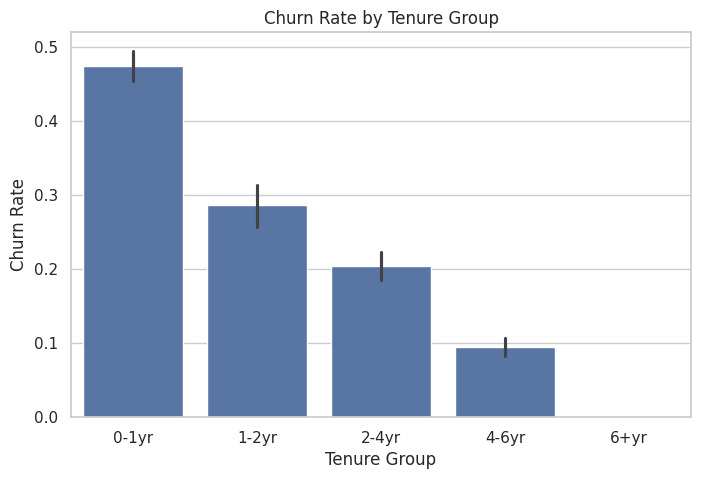

In [63]:
plt.figure(figsize=(8,5))
sns.barplot(
    x="tenure_group",
    y="churn",
    data=df_fe,
    estimator=lambda x: sum(x)/len(x)
)
plt.title("Churn Rate by Tenure Group")
plt.ylabel("Churn Rate")
plt.xlabel("Tenure Group")
plt.show()


**Churn vs Tenure Group**

**Business Question:** Do newer customers churn more than long-tenure customers?

**Insight:** Customers in their first year show the highest churn rate, which steadily decreases as tenure increases. Customers with 4+ years of tenure have the lowest likelihood of churning, indicating stronger loyalty over time.

**Business Interpretation:** The first year is the most critical retention window. Customers who survive beyond early tenure are significantly more stable.

**Actionable Recommendation:** Focus retention efforts (onboarding, follow-ups, incentives) within the first 12 months, where churn risk is highest.

# **Churn vs Contract Type**

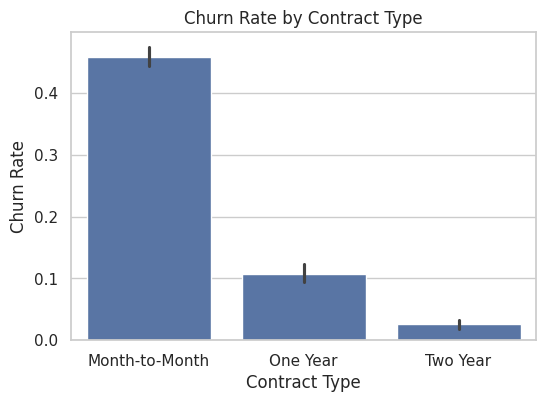

In [64]:
plt.figure(figsize=(6,4))
sns.barplot(
    x="Contract",
    y="churn",
    data=df_fe,
    estimator=lambda x: sum(x)/len(x)
)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.xlabel("Contract Type")
plt.show()


**Churn vs Contract Type**

**Business Question:** Does contract length influence customer churn?

**Insight:** Customers on month-to-month contracts churn at a much higher rate compared to those on one-year or two-year contracts. Two-year contract customers have the lowest churn.

**Business Interpretation:** Longer contracts act as a retention mechanism, reducing churn by increasing customer commitment.

**Actionable Recommendation:** Incentivize month-to-month customers to switch to longer-term contracts through discounts or bundled services.

# **Churn vs Monthly Revenue**

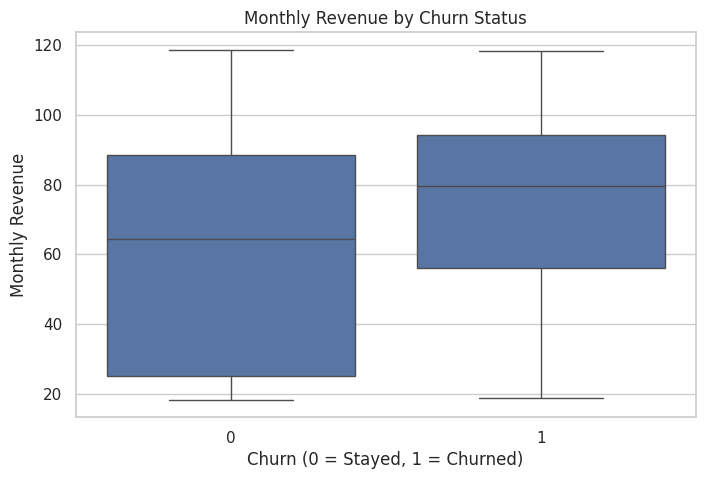

In [65]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x="churn",
    y="monthly_revenue",
    data=df_fe
)
plt.title("Monthly Revenue by Churn Status")
plt.xlabel("Churn (0 = Stayed, 1 = Churned)")
plt.ylabel("Monthly Revenue")
plt.show()


**Churn vs Monthly Revenue**

**Business Question:** Are higher-paying customers more likely to churn?

**Insight:** Churned customers have a higher median monthly revenue compared to retained customers, suggesting that higher prices may contribute to churn.

**Business Interpretation:** Price sensitivity is a key churn driver, especially among high-value customers, which poses a significant revenue risk.

**Actionable Recommendation:** Introduce targeted pricing reviews or loyalty discounts for high-revenue customers before they churn.

# **Churn vs Engagement**

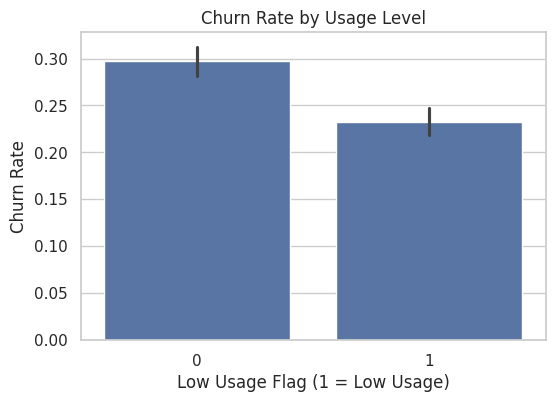

In [66]:
plt.figure(figsize=(6,4))
sns.barplot(
    x="low_usage_flag",
    y="churn",
    data=df_fe,
    estimator=lambda x: sum(x)/len(x)
)
plt.title("Churn Rate by Usage Level")
plt.xlabel("Low Usage Flag (1 = Low Usage)")
plt.ylabel("Churn Rate")
plt.show()


**Churn vs Engagement (Usage)**

**Business Question:** Does low service usage increase churn risk?

**Insight:** Customers flagged as low usage have a noticeably higher churn rate than high-usage customers.

**Business Interpretation:** Low engagement often signals poor perceived value or mismatch between customer needs and the service offering.

**Actionable Recommendation:** Proactively engage low-usage customers with education, feature discovery, or personalized offers to increase usage.

# **Churn vs Satisfaction**

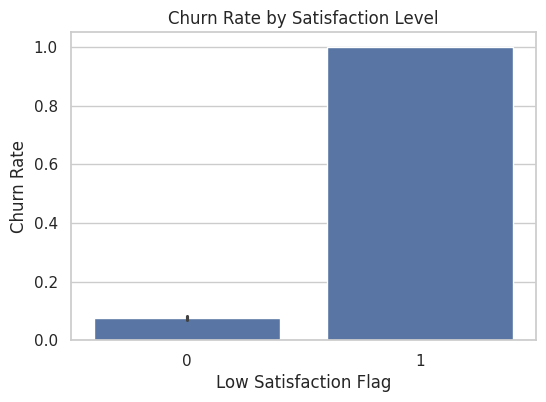

In [67]:
plt.figure(figsize=(6,4))
sns.barplot(
    x="low_satisfaction_flag",
    y="churn",
    data=df_fe,
    estimator=lambda x: sum(x)/len(x)
)
plt.title("Churn Rate by Satisfaction Level")
plt.xlabel("Low Satisfaction Flag")
plt.ylabel("Churn Rate")
plt.show()


**Churn vs Satisfaction**

**Business Question:** How strongly does customer satisfaction affect churn?

**Insight:** Customers with low satisfaction scores show extremely high churn rates, while satisfied customers rarely churn.

**Business Interpretation:** Customer satisfaction is one of the strongest predictors of churn, indicating service quality and experience issues.

**Actionable Recommendation:** Prioritize rapid intervention for dissatisfied customers through support outreach, issue resolution, or service recovery programs.

# BASELINE MODEL (LOGISTIC REGRESSION)

**Create modeling DataFrame**

In [71]:
df_model = df_fe.copy()


In [72]:
leakage_cols = [
    "Customer ID",
    "Churn Category",
    "Churn Reason",
    "Customer Status",
    "Churn Score",
    "CLTV"
]

df_model.drop(columns=[col for col in leakage_cols if col in df_model.columns], inplace=True)


**Separate target variable**

In [73]:
X = df_model.drop("churn", axis=1)
y = df_model["churn"]


**Encode categorical variables**

In [74]:
X_encoded = pd.get_dummies(X, drop_first=True)


**Train-test split**

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


**Train Logistic Regression**

In [76]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

**Make predictions**

In [78]:
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]


**Evaluating properly**

In [79]:
from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1294
           1       0.96      0.86      0.91       467

    accuracy                           0.95      1761
   macro avg       0.96      0.92      0.94      1761
weighted avg       0.95      0.95      0.95      1761



In [80]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC:", roc_auc)


ROC-AUC: 0.983650450605496


# **Why Accuracy Is Misleading in Churn Prediction**

Although the model achieved a high accuracy of 95%, accuracy alone is not an appropriate metric for evaluating churn prediction models. This dataset is imbalanced, with significantly more customers staying than churning. As a result, a model can achieve high accuracy by correctly predicting the majority “non-churn” class while still missing customers who are actually at risk of leaving.

In this case, most customers belong to the non-churn class (Class 0). If the model focused only on accuracy, it could prioritize predicting “no churn” and still appear highly performant, while failing the core business objective of identifying churners early.

For churn prediction, the business goal is not to be correct most of the time, but to identify as many potential churners as possible before they leave. This makes recall for the churn class (Class 1) the more meaningful metric. In this model, the recall for churners is 86%, meaning the model successfully identifies the majority of customers who are likely to churn.

Additionally, the ROC-AUC score of approximately 0.984 indicates excellent discrimination ability. This shows the model is highly effective at ranking customers by churn risk across different probability thresholds, which is critical for prioritizing retention actions.

**Conclusion:**
Accuracy alone can create a false sense of confidence in churn prediction problems. Recall and ROC-AUC are more meaningful metrics because they align directly with the business goal of proactively identifying and retaining high-risk customers.

**Sanity check**

In [81]:
y.value_counts(normalize=True)


churn
0    0.73463
1    0.26537
Name: proportion, dtype: float64

**Sanity Check: Class Distribution of Churn**

A sanity check was performed to understand the class distribution of the target variable (churn). The results show that approximately 73% of customers did not churn, while only 27% of customers churned.

This confirms that the dataset is imbalanced, with significantly fewer churned customers compared to retained customers. In such scenarios, accuracy can be misleading because a model can achieve high accuracy by simply predicting the majority class (non-churn) while failing to identify customers who are actually at risk of leaving.

Understanding this imbalance is critical because the business objective of churn prediction is to identify and intervene on potential churners, not just to classify the majority correctly. This sanity check therefore justifies the use of recall for the churn class and ROC-AUC as the primary evaluation metrics, rather than relying on accuracy alone.

# MODEL EXPLAINABILITY

**Extracting and sorting coefficients**

In [82]:
import pandas as pd

coef_df = pd.DataFrame({
    "feature": X_encoded.columns,
    "coefficient": log_reg.coef_[0]
})

coef_df["abs_coef"] = coef_df["coefficient"].abs()
coef_df = coef_df.sort_values(by="abs_coef", ascending=False)

coef_df.head(10)


,feature,coefficient,abs_coef
10,Satisfaction Score,-2.251868,2.251868
16,low_satisfaction_flag,1.285155,1.285155
14,is_month_to_month,0.745533,0.745533
29,Online Security_Yes,-0.565310,0.565310
17,Referred a Friend_Yes,0.478853,0.478853
45,Married_Yes,0.474217,0.474217
38,Contract_Two Year,-0.393331,0.393331
39,Paperless Billing_Yes,0.364075,0.364075
9,Number of Dependents,-0.282826,0.282826
32,Premium Tech Support_Yes,-0.250382,0.250382


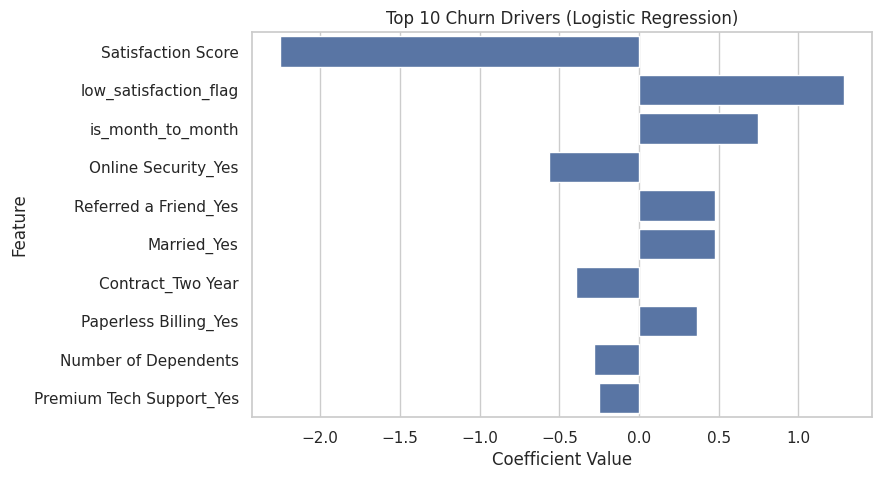

In [83]:
plt.figure(figsize=(8,5))
sns.barplot(
    x="coefficient",
    y="feature",
    data=coef_df.head(10)
)
plt.title("Top 10 Churn Drivers (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()


**Model Explainability (Key Insights)**

This section explains which features most influence the model’s churn predictions and in what direction.

* Positive coefficients increase churn risk
* Negative coefficients reduce churn risk
* Larger absolute values indicate stronger influence

**Key Findings**

* Customer satisfaction is the most influential factor.

1. Low satisfaction strongly increases churn.
2. Higher satisfaction significantly reduces churn risk.


* Month-to-month contracts are a major churn driver, while two-year contracts reduce churn.
* Value-added services (Online Security, Premium Tech Support) lower churn likelihood.
* Customers with more dependents are less likely to churn.

**Business Takeaway**
The model is interpretable and aligned with business logic. Churn is primarily driven by satisfaction, contract type, and service engagement, making the predictions actionable for retention strategies.

# Logistic Regression Interpretation

**SHAP Explainability**

In [89]:
import shap


In [95]:
# SHAP explainer

explainer = shap.LinearExplainer(
    log_reg,
    X_train,
    feature_perturbation="interventional"
)


/usr/local/lib/python3.12/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


In [96]:
X_train.dtypes.value_counts()


bool       244
int64       10
float64      7
Name: count, dtype: int64

In [103]:
X_train_num = X_train.copy()

# Convert booleans
X_train_num = X_train_num.astype(float)

In [98]:
# CreatING explainer

explainer = shap.LinearExplainer(
    log_reg,
    X_train_num,
    feature_perturbation="interventional"
)

/usr/local/lib/python3.12/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


In [99]:
# Compute SHAP values
shap_values = explainer.shap_values(X_train_num)

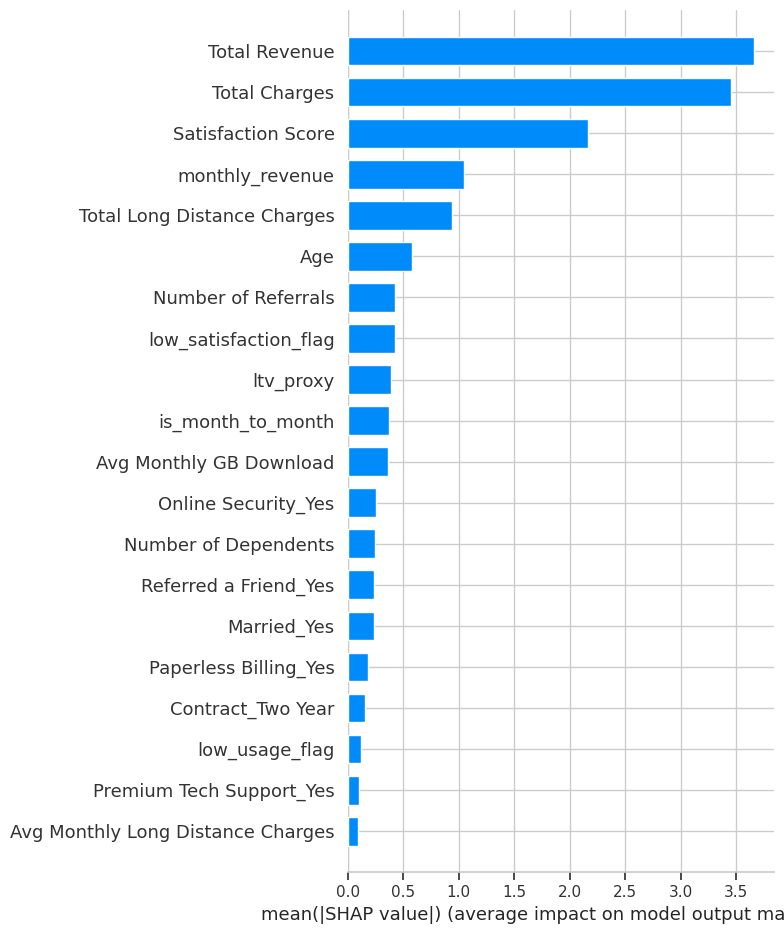

In [100]:
#Plot
shap.summary_plot(shap_values, X_train_num, plot_type="bar")

**Global Feature Importance (Bar Plot)**

The SHAP bar plot shows the average absolute impact of each feature on the model output.


* Total Revenue, Total Charges, and Satisfaction Score are the most influential features.
* Financial value and customer experience variables dominate churn prediction.
* This confirms that churn is strongly linked to revenue contribution and satisfaction levels.


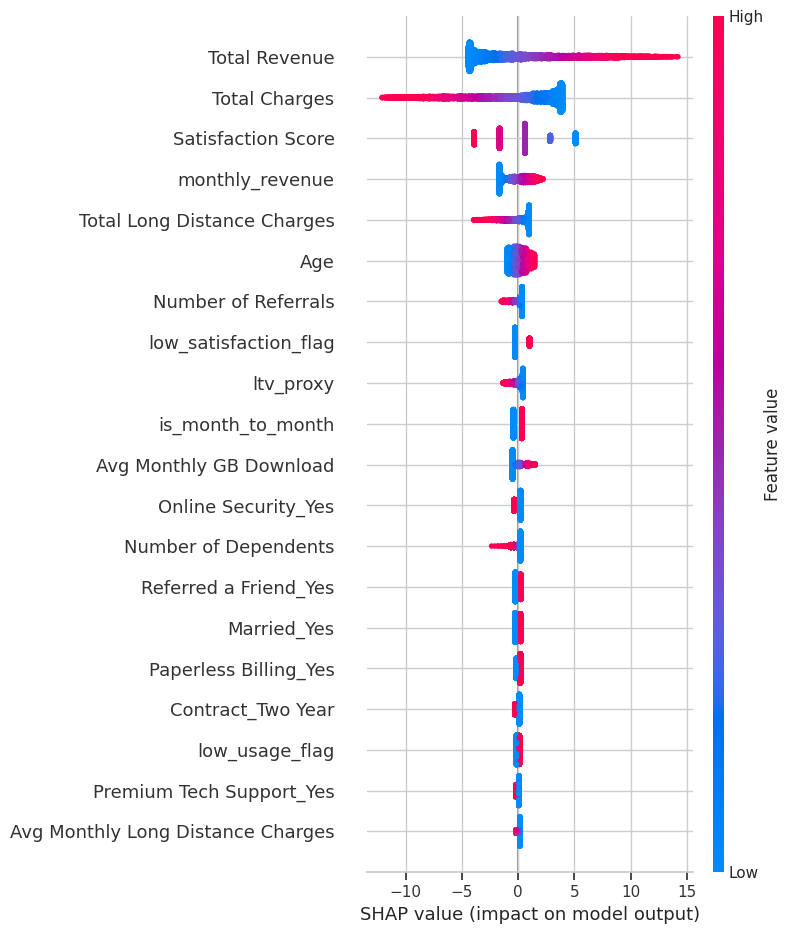

In [101]:
shap.summary_plot(shap_values, X_train_num)

**Directional Impact (Beeswarm Plot)**

The SHAP beeswarm plot explains how feature values influence churn direction:

* High revenue and charges tend to push predictions toward churn, indicating high-value customers are at risk.
* Low satisfaction scores strongly increase churn probability.
* Contract type and service features have smaller but consistent effects.


**Key Takeaway**

The SHAP analysis validates earlier EDA and coefficient analysis, showing that customer value, satisfaction, and pricing behavior are the primary drivers of churn. The model’s predictions are transparent, consistent, and business-aligned.